In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv(r"E:\Data Science by SRK\Machine_learning\Classification\mouse_data\cleaned_dataset_mouse.csv")

In [3]:
df

,Med_1_mL,Med_2_mL,Virus_Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus_Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [5]:
df.isnull().sum()

Med_1_mL         0
Med_2_mL         0
Virus_Present    0
dtype: int64

# X and y

In [6]:
X = df.drop(columns = ['Virus_Present'])
y = df['Virus_Present']

# Train_test_split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= True)

# Gradient Boost

**Applying Hyperparameter Tuning for identiying best parameters for Gradient Boost**

In [9]:
from sklearn.model_selection import GridSearchCV

# modelling

from sklearn.ensemble import GradientBoostingClassifier
estimator_gb = GradientBoostingClassifier()

# parameters grid
param_grid_gb = {"n_estimators" : [1,5,10,20],
                'learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 1]}

# grid search
grid_gb = GridSearchCV(estimator_gb, param_grid_gb, cv = 5, scoring = 'accuracy')
grid_gb.fit(X_train, y_train)

# best parameters for GradientBoostingClassifier model
grid_gb.best_params_

{'learning_rate': 0.1, 'n_estimators': 1}

# Gradient Boost model importance feature

In [12]:
feats_gb = pd.DataFrame(data = grid_gb.best_estimator_.feature_importances_,
                       index = X.columns, 
                       columns = ['Importance'])
imp_features_list_gb = feats_gb[feats_gb['Importance']>0].index.to_list()
imp_features_list_gb

['Med_1_mL', 'Med_2_mL']

# Gradient Boost Classifier

**with imp features and imp parameters**

In [13]:
# important input variables
X_imp = X[imp_features_list_gb]

# train test split
X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(X_imp, y, test_size = 0.2, random_state = True)
# modelling
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators= 1, learning_rate = 0.1)
gb.fit(X_train_gb, y_train_gb)

# Evaluation on train data
ypred_train_gb = gb.predict(X_train_gb)

from sklearn.metrics import accuracy_score
print("Train_accuracy : ", accuracy_score(y_train_gb, ypred_train_gb))

# cross validation
from sklearn.model_selection import cross_val_score
print("cross_val_score : ", cross_val_score(gb, X_train_gb, y_train_gb, cv = 5).mean())

# Evaluation
ypred_test_gb = gb.predict(X_test_gb)
print("Test_accuracy : ", accuracy_score(y_test_gb, ypred_test_gb))


Train_accuracy :  1.0
cross_val_score :  0.99375
Test_accuracy :  1.0


In [14]:
%%timeit
gb.fit(X_train_gb, y_train_gb)


5.53 ms ± 43.9 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Final Model

In [15]:
gb = GradientBoostingClassifier(n_estimators= 1, learning_rate = 0.1)

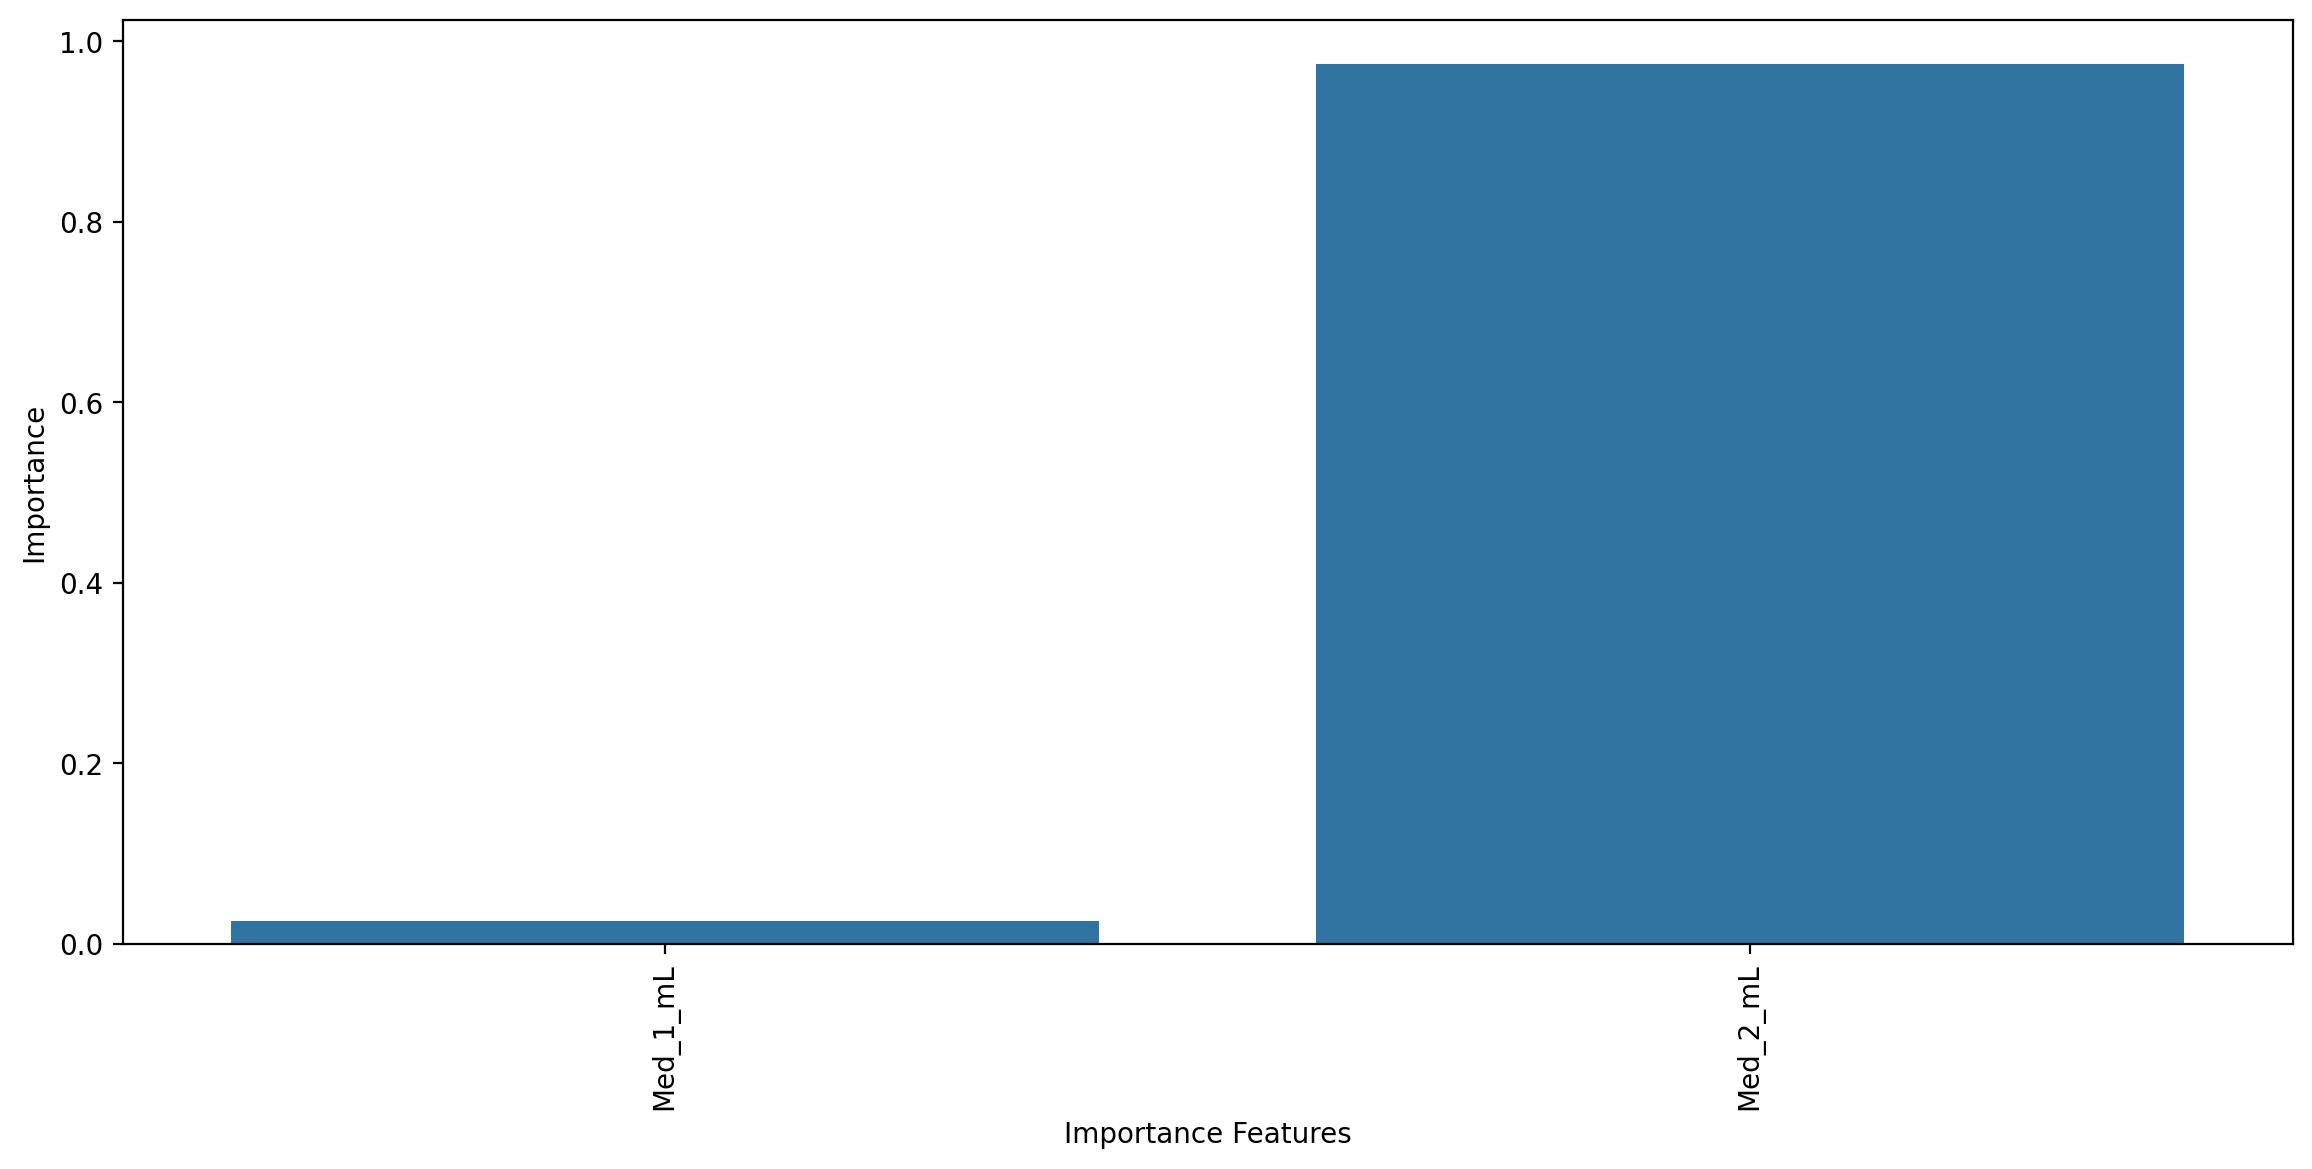

In [16]:
plt.figure(figsize = (14,6), dpi = 200)

sns.barplot(data = feats_gb[feats_gb['Importance'] > 0].sort_values('Importance'),
           x = feats_gb[feats_gb['Importance'] > 0].index,
           y = 'Importance')
plt.xticks(rotation = 90)
plt.xlabel('Importance Features')
plt.show()

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_gb, ypred_test_gb)

array([[36,  0],
       [ 0, 44]], dtype=int64)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test_gb, ypred_test_gb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        44

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

